# Stock Web Scraper Project

Scrape data from yahoo finance and aastocks to: 
- analyze and find corrlations with the changing price among companies
- collect real time stock prices and place data into csv file

**Tool used:** 
- Web scrapping *(DataReader, BeautifulSoup, Requests)*
- Time *(Datetime, time)*
- Visualization *(Matplolib, Seaborn)*

### Import Libraries

In [1]:
# !pip install pandas_datareader
# collate data from online sources into dataframe
from pandas_datareader import data

In [2]:
# !pip install yfinance
# https://pypi.org/project/yfinance/
import yfinance as yf

In [3]:
from bs4 import BeautifulSoup
import requests

import time
from datetime import datetime

# sending emails
import smtplib

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
import csv

***

### DataReader Library
collate 2021-2022 Facebook Stock Data from yahoo into dataframe

In [6]:
df_fb = data.DataReader('FB', 'yahoo', '2022')

In [7]:
df_fb.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-12-31,343.440002,336.269989,343.019989,336.350006,12870500,336.350006
2022-01-03,341.079987,337.190002,338.299988,338.540009,14537900,338.540009
2022-01-04,343.089996,331.869995,339.950012,336.529999,15998000,336.529999
2022-01-05,335.760010,323.839996,333.019989,324.170013,20564500,324.170013
2022-01-06,339.170013,322.720001,322.820007,332.459991,27962800,332.459991


In [8]:
df_fb.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-01-27,301.709991,294.260010,297.750000,294.640015,21629900,294.640015
2022-01-28,301.899994,293.029999,295.619995,301.709991,21871600,301.709991
2022-01-31,313.790009,299.320007,300.679993,313.260010,21579500,313.260010
2022-02-01,319.660004,312.119995,314.559998,319.000000,17895200,319.000000
2022-02-02,328.000000,321.551788,327.820007,325.440002,3836196,325.440002


***

# FAANG

### Give Current time using datetime library

In [9]:
now = datetime.now()

In [10]:
now

datetime.datetime(2022, 2, 2, 22, 40, 23, 250975)

### Set start time to be 1 year ago

In [11]:
start = datetime(now.year-1, now.month, now.day)

In [12]:
start

datetime.datetime(2021, 2, 2, 0, 0)

### Show FAANG Data from yahoo fiance

In [13]:
# Facebook, Amazon, Apple, Netflix, Google
tickers = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

In [14]:
FAANG = yf.download(tickers,start, now)

[*********************100%***********************]  5 of 5 completed


In [15]:
FAANG.head()

Adj Close                                                    \
                  AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                       
2021-02-01  133.318130  3342.879883  262.010010  1901.349976  539.039978   
2021-02-02  134.162918  3380.000000  267.079987  1927.510010  548.159973   
2021-02-03  133.119354  3312.530029  266.649994  2070.070068  539.450012   
2021-02-04  136.548203  3331.000000  266.489990  2062.370117  552.159973   
2021-02-05  136.125168  3352.149902  268.100006  2098.000000  550.789978   

                 Close                                                    ...  \
                  AAPL         AMZN          FB         GOOG        NFLX  ...   
Date                                                                      ...   
2021-02-01  134.139999  3342.879883  262.010010  1901.349976  539.039978  ...   
2021-02-02  134.990005  3380.000000  267.079987  1927.510010  548.159973  ...   
2021-02-03  133.940002  3312.530029  266.649994  2070.070068  539.450012  ...   
2021-02-04  137.389999  3331.000000  266.489990  2062.370117  552.159973  ...   
2021-02-05  136.759995  3352.149902  268.100006  2098.000000  550.789978  ...   

                  Open                                                    \
                  AAPL         AMZN          FB         GOOG        NFLX   
Date                                                                       
2021-02-01  133.750000  3242.360107  259.519989  1853.569946  536.789978   
2021-02-02  135.729996  3380.000000  264.000000  1922.560059  542.010010   
2021-02-03  135.759995  3425.010010  265.619995  2073.000000  550.169983   
2021-02-04  136.300003  3330.000000  267.010010  2068.889893  539.809998   
2021-02-05  137.350006  3319.000000  266.799988  2070.000000  552.260010   

               Volume                                       
                 AAPL     AMZN        FB     GOOG     NFLX  
Date                                                        
2021-02-01  106239800  4160200  22914300  1602200  3547500  
2021-02-02   83305400  7098600  17320800  2273700  3767600  
2021-02-03   89880900  7088800  14223400  4118200  3172300  
2021-02-04   84183100  3670700  16060000  1852300  5164500  
2021-02-05   75693800  3620800  12454400  1535100  2376200  

[5 rows x 30 columns]

### Show the max close price and date of the year

In [16]:
FAANG['Close'].max()

AAPL     182.009995
AMZN    3731.409912
FB       382.179993
GOOG    3014.179932
NFLX     691.690002
dtype: float64

In [17]:
FAANG['Close'].idxmax()

AAPL   2022-01-03
AMZN   2021-07-08
FB     2021-09-07
GOOG   2021-11-18
NFLX   2021-11-17
dtype: datetime64[ns]

### Use plot to visualize Close Price

In [18]:
FAANG['Close'].head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2021-02-01,134.139999,3342.879883,262.010010,1901.349976,539.039978
2021-02-02,134.990005,3380.000000,267.079987,1927.510010,548.159973
2021-02-03,133.940002,3312.530029,266.649994,2070.070068,539.450012
2021-02-04,137.389999,3331.000000,266.489990,2062.370117,552.159973
2021-02-05,136.759995,3352.149902,268.100006,2098.000000,550.789978


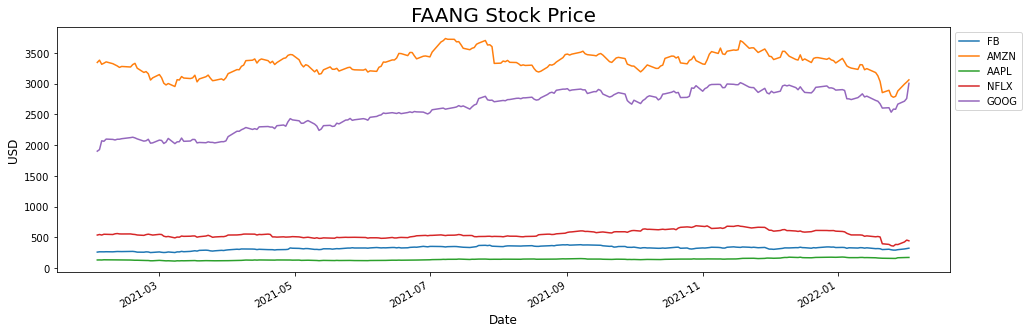

In [19]:
close = FAANG['Close']
plt.figure(figsize=(16,5)) 
close["FB"].plot()
close['AMZN'].plot()
close['AAPL'].plot()
close['NFLX'].plot()
close['GOOG'].plot()

plt.xlabel("Date", fontsize=12)
plt.ylabel("USD", fontsize=12)
plt.title("FAANG Stock Price", fontsize=20)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left')

### Use heatmap to visualize the correlation among the companies

In [20]:
# compute percentage change between today and yeserday close price
FAANG['Close'].pct_change().head()

,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2021-02-01,NaN,NaN,NaN,NaN,NaN
2021-02-02,0.006337,0.011104,0.019350,0.013759,0.016919
2021-02-03,-0.007778,-0.019962,-0.001610,0.073961,-0.015889
2021-02-04,0.025758,0.005576,-0.000600,-0.003720,0.023561
2021-02-05,-0.004586,0.006349,0.006042,0.017276,-0.002481


In [21]:
df1 = FAANG['Close'].pct_change().corr()

In [22]:
df1 

,AAPL,AMZN,FB,GOOG,NFLX
AAPL,1.000000,0.607085,0.483193,0.543743,0.349928
AMZN,0.607085,1.000000,0.545548,0.559600,0.466479
FB,0.483193,0.545548,1.000000,0.563371,0.434105
GOOG,0.543743,0.559600,0.563371,1.000000,0.323908
NFLX,0.349928,0.466479,0.434105,0.323908,1.000000


Text(51.0, 0.5, 'FAANG')

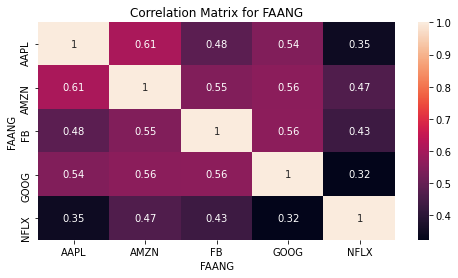

In [23]:
plt.figure(figsize=(8,4))
sns.heatmap(df1,annot=True)

plt.title('Correlation Matrix for FAANG')
plt.xlabel('FAANG')
plt.ylabel('FAANG')

### Apple and Amazon have a relatively higher corrlation, with a correlation of 0.6

***

# AA stock

Use Python package requests and BeautifulSoup to scrape stock prices from aastocks.com
1. Locate the API
2. Copy request header from developer tools
3. Put the request into BeautifulSoup
4. Use css selector to find stock price

In [64]:
# Alibaba (9988)
url = 'http://www.aastocks.com/tc/stocks/quote/quick-quote.aspx?symbol=09988'

# request header
# user-Agent: create illusion that we are from the browser environment
# Referer: identify the address of the webpage which is linked to this requested resource

headers = {
        "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36",
        "Referer":"http://www.aastocks.com/tc/"}

In [56]:
# Connect to Website and pull in Data
session = requests.session()
req = session.get(url, headers = headers)

In [57]:
# Check if request succesfully
req.status_code

200

In [58]:
req.text

'\r<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <head id="Head1"><meta http-equiv="X-UA-Compatible" content="IE=Edge" /><meta name="google-site-verification" content="PSvX40cckR7V_q8QVaRk5jnTEIeinakRTyMqcjv9WPI" /> <script type="text/javascript">\rvar _gaq = _gaq || [];\r_gaq.push([\'_setAccount\', \'UA-20790503-3\']);\r_gaq.push([\'_setDomainName\', \'www.aastocks.com\']);\r_gaq.push([\'_setSampleRate\', \'5\']);\r_gaq.push([\'_trackPageview\']);\r_gaq.push([\'_trackPageLoadTime\']);\r_gaq.push([\'a3._setAccount\', \'UA-130882905-1\']);\r_gaq.push([\'a3._setDomainName\', \'www.aastocks.com\']);\r_gaq.push([\'a3._trackPageview\']);\r_gaq.push([\'a3._trackPageLoadTime\']);\r_gaq.push([\'vt._setAccount\', \'UA-131025525-1\']);\r_gaq.push([\'vt._setDomainName\', \'www.aastocks.com\']);\rfunction O

### Pass the results into BeautifulSoup

In [59]:
soup = BeautifulSoup(req.text)

In [60]:
soup2 = BeautifulSoup(soup.prettify(),'html.parser')

In [61]:
soup2

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">

<html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head id="Head1">
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="PSvX40cckR7V_q8QVaRk5jnTEIeinakRTyMqcjv9WPI" name="google-site-verification"/>
<script type="text/javascript">
   var _gaq = _gaq || [];
_gaq.push(['_setAccount', 'UA-20790503-3']);
_gaq.push(['_setDomainName', 'www.aastocks.com']);
_gaq.push(['_setSampleRate', '5']);
_gaq.push(['_trackPageview']);
_gaq.push(['_trackPageLoadTime']);
_gaq.push(['a3._setAccount', 'UA-130882905-1']);
_gaq.push(['a3._setDomainName', 'www.aastocks.com']);
_gaq.push(['a3._trackPageview']);
_gaq.push(['a3._trackPageLoadTime']);
_gaq.push(['vt._setAccount', 'UA-131025525-1']);
_gaq.push(['vt._setDomainName', 'www.aastocks.com']);
function OA_show(name) {}
  </script>
<meta content="2022-

### Extract Stock Name

In [62]:
StockName = soup.find('a',{'class':'a17 cls'}).text.strip()

In [63]:
StockName

'美團－Ｗ'

### Extract Stock Price

In [33]:
soup.select(".content span")

[<span style="margin:0px 3px;">(</span>,
 <span class="ss1 lbl_l pt" id="btnIndex">指數</span>,
 <span style="margin:0px 3px;">|</span>,
 <span class="ss1 lbl_l pt" id="btnCategory">行業</span>,
 <span style="margin:0px 3px;">)</span>,
 <span class="9.d0"><span class="0779f0e.7"><span class="1a90.e6d"><span class="pos"><span class="arrowUpDn">▲</span>114.000</span></span></span></span>,
 <span class="0779f0e.7"><span class="1a90.e6d"><span class="pos"><span class="arrowUpDn">▲</span>114.000</span></span></span>,
 <span class="1a90.e6d"><span class="pos"><span class="arrowUpDn">▲</span>114.000</span></span>,
 <span class="pos"><span class="arrowUpDn">▲</span>114.000</span>,
 <span class="arrowUpDn">▲</span>,
 <span class="casvcm"></span>,
 <span class="pos"><span class="arrowUpDn">▲</span>4.000</span>,
 <span class="arrowUpDn">▲</span>,
 <span class="pos"><span class="arrowUpDn">▲</span>3.636</span>,
 <span class="arrowUpDn">▲</span>,
 <span class="pos"><span style="font-size:20px">%</span>

In [34]:
soup.select(".content span")[6]

<span class="0779f0e.7"><span class="1a90.e6d"><span class="pos"><span class="arrowUpDn">▲</span>114.000</span></span></span>

In [35]:
soup.select(".content span")[6].text

'▲114.000'

In [36]:
soup.select(".content span")[6].text[1:]

'114.000'

In [37]:
Price = soup.select(".content span")[6].text[1:]

In [38]:
Price

'114.000'

### Extract Multiple Stock Prices Using Function

In [39]:
def getStockPrice(num):
    url = 'http://www.aastocks.com/tc/stocks/quote/quick-quote.aspx?symbol={}'.format(num)
    session = requests.session()
    headers = {
    "User-Agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36",

    "Referer":"http://www.aastocks.com/tc/"
    }
    req = session.get(url, headers = headers)
    soup = BeautifulSoup(req.text)
    return soup.select(".content span")[6].text[1:]

In [40]:
stock = ['9988','700','3690','5']

for stockNum in stock:
    print('{} : {}'.format(stockNum, getStockPrice(stockNum)))

9988 : 114.000
700 : 472.000
3690 : 219.600
5 : 55.150


### Create csv and Insert data into csv

In [51]:
#Set today date
today = ('{}-{}-{}').format(now.year,now.month,now.day)

In [45]:
header = ['Date','Stock Name','Closing Price']
data = [today,StockName, Price]

with open('StockPriceWebScrapper.csv', 'w',newline='',encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [54]:
import pandas as pd
pd.read_csv('StockPriceWebScrapper.csv')

,Date,Stock Name,Closing Price
0,2022-2-2,阿里巴巴－ＳＷ,114.0


In [ ]:
### Append data to the csv

with open('StockPriceWebScrapper.csv', 'w',newline='',encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [ ]:
def check_price():